In [41]:
library(Seurat)
library(Azimuth)
library(SeuratData)
library(patchwork)

-- Installed datasets -------------------------------- SeuratData v0.2.2.9001 --

v pbmcref 1.0.0                         v pbmcsca 3.0.0


-------------------------------------- Key -------------------------------------

v Dataset loaded successfully
> Dataset built with a newer version of Seurat than installed
(?) Unknown version of Seurat installed




In [4]:
seurat_obj <- readRDS(paste0("../clustering/out/integrated_seurat_clusters_0.2.rds"))
print(seurat_obj)

An object of class Seurat 
21673 features across 31795 samples within 1 assay 
Active assay: RNA (21673 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap


In [42]:
available_data <- AvailableData()
available_data[grep("Azimuth", available_data[,3]), 1:3]

,Dataset,Version,Summary
,<chr>,<pckg_vrs>,<chr>
adiposeref.SeuratData,adiposeref,1.0.0,Azimuth Reference: adipose
bonemarrowref.SeuratData,bonemarrowref,1.0.0,Azimuth Reference: bonemarrow
fetusref.SeuratData,fetusref,1.0.0,Azimuth Reference: fetus
heartref.SeuratData,heartref,1.0.0,Azimuth Reference: heart
humancortexref.SeuratData,humancortexref,1.0.0,Azimuth Reference: humancortex
kidneyref.SeuratData,kidneyref,1.0.2,Azimuth Reference: kidney
lungref.SeuratData,lungref,2.0.0,Azimuth Reference: lung
mousecortexref.SeuratData,mousecortexref,1.0.0,Azimuth Reference: mousecortex
pancreasref.SeuratData,pancreasref,1.0.0,Azimuth Reference: pancreas


### Immune cells - cluster 3,4,7

In [36]:
immune_cells <- subset(seurat_obj, subset=RNA_snn_res.0.05 %in% c(3,4,6,7))
immune_cells

An object of class Seurat 
21673 features across 4736 samples within 1 assay 
Active assay: RNA (21673 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap

In [37]:
immune_cells_az <- RunAzimuth(immune_cells, reference="pbmcref")

Warning message:
"Overwriting miscellanous data for model"
Warning message:
"Adding a dimensional reduction (refUMAP) without the associated assay being present"
Warning message:
"Adding a dimensional reduction (refUMAP) without the associated assay being present"
detected inputs from HUMAN with id type Gene.name

reference rownames detected HUMAN with id type Gene.name

Normalizing query using reference SCT model

Warning message:
"888 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 4112 features."
Projecting cell embeddings

Finding query neighbors

Finding neighborhoods

Finding anchors

	Found 1686 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Predicting cell labels

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Predicting cell labels

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes 

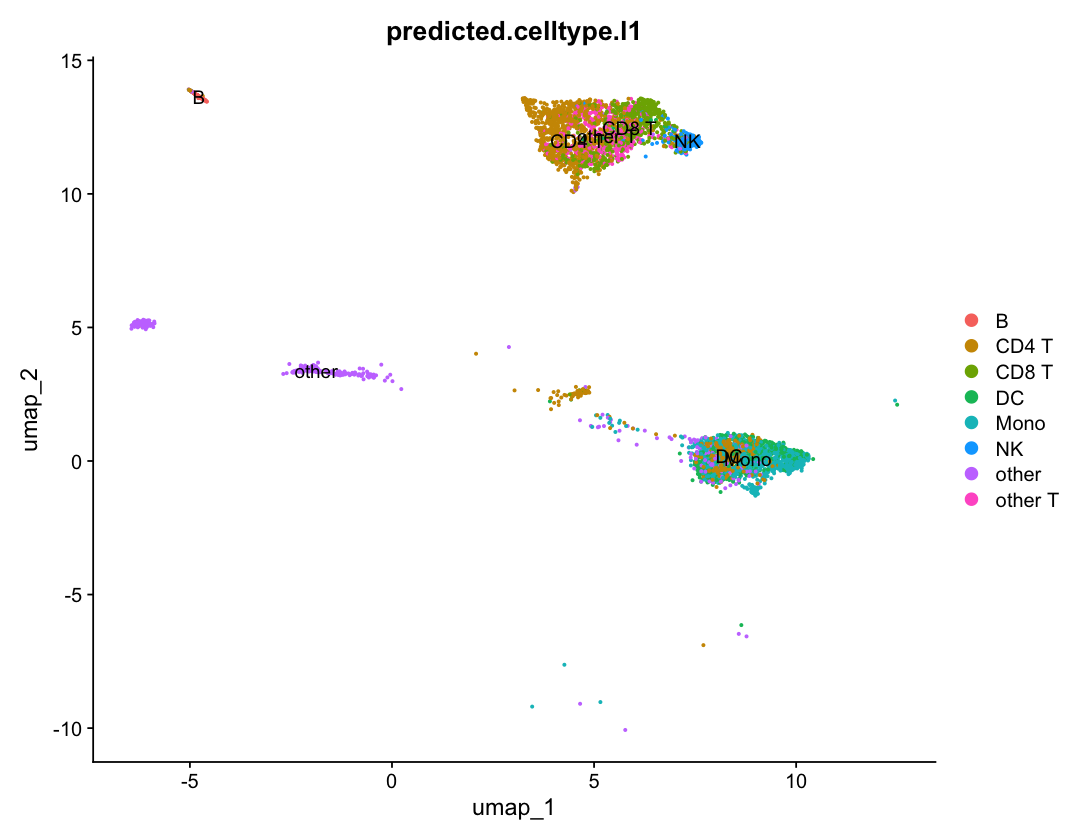

In [44]:
options(repr.plot.height=7, repr.plot.width=9)
DimPlot(immune_cells_az, group.by="predicted.celltype.l1", label=TRUE, label.size=4)

### Tumor cells

In [48]:
tumor_cells <- subset(seurat_obj, subset=RNA_snn_res.0.05 %in% c(0, 1,2,5))
tumor_cells

An object of class Seurat 
21673 features across 27059 samples within 1 assay 
Active assay: RNA (21673 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap

In [49]:
tumor_cells_az <- RunAzimuth(tumor_cells, reference="humancortexref")

Warning message:
"Overwriting miscellanous data for model"
Warning message:
"Adding a dimensional reduction (refUMAP) without the associated assay being present"
Warning message:
"Adding a dimensional reduction (refUMAP) without the associated assay being present"
detected inputs from HUMAN with id type Gene.name

reference rownames detected HUMAN with id type Gene.name

Normalizing query using reference SCT model

Warning message:
"822 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 2178 features."
Projecting cell embeddings

Finding query neighbors

Finding neighborhoods

Finding anchors

	Found 565 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Predicting cell labels

Predicting cell labels

Predicting cell labels

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"

Integrating dataset 2 with reference dataset

Finding integra

In [50]:
head(tumor_cells_az@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,diagnosis,age,sex,tissue_location,RNA_snn_res.0.1,seurat_clusters,pANN_1,...,RNA_snn_res.0.99,predicted.class.score,predicted.class,predicted.cluster.score,predicted.cluster,predicted.subclass.score,predicted.subclass,predicted.cross_species_cluster.score,predicted.cross_species_cluster,mapping.score
,<chr>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<fct>,<fct>,<dbl>,...,<fct>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG,SCPCS000002,36546,5588,Glioblastoma,7,F,Right thalamus,2,3,0.2857143,...,3,1,Non-Neuronal,1.0000000,Micro L1-6 TYROBP CD74,1.0000000,Micro-PVM,1.0000000,Microglia/PVM,0.75127948
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG,SCPCS000002,38553,5642,Glioblastoma,7,F,Right thalamus,2,3,0.3809524,...,3,1,Non-Neuronal,0.9773174,Micro L1-6 TYROBP CD74,0.9773174,Micro-PVM,0.9773174,Microglia/PVM,0.03442290
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC,SCPCS000002,38022,7026,Glioblastoma,7,F,Right thalamus,0,16,0.2857143,...,16,1,Non-Neuronal,0.3737719,Astro L1-6 FGFR3 AQP1,0.7983869,Astro,0.6308931,Astro_1,0.52167949
SCPCS000002_doubletfinder.rds_TCAATCTAGATTAGCA,SCPCS000002,42212,6622,Glioblastoma,7,F,Right thalamus,2,14,0.3333333,...,14,1,Non-Neuronal,0.9457729,Micro L1-6 TYROBP CD74,0.9457729,Micro-PVM,0.9457729,Microglia/PVM,0.12829990
SCPCS000002_doubletfinder.rds_TTCCGGTCACCCAAGC,SCPCS000002,40461,6109,Glioblastoma,7,F,Right thalamus,2,13,0.3809524,...,13,1,Non-Neuronal,0.9734677,Micro L1-6 TYROBP CD74,0.9734677,Micro-PVM,0.9734677,Microglia/PVM,0.01294092
SCPCS000002_doubletfinder.rds_CATAAGCCACCCTATC,SCPCS000002,40005,5313,Glioblastoma,7,F,Right thalamus,2,3,0.4285714,...,3,1,Non-Neuronal,0.9789904,Micro L1-6 TYROBP CD74,0.9789904,Micro-PVM,0.9789904,Microglia/PVM,0.07115297


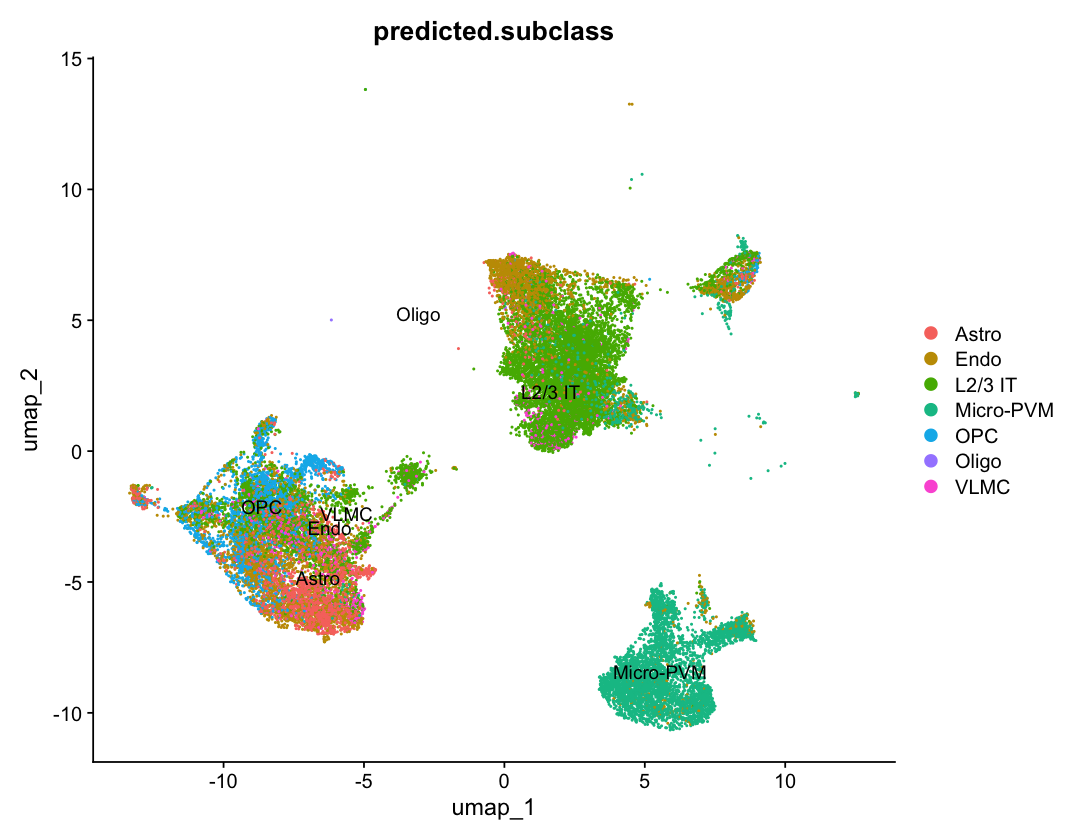

In [51]:
options(repr.plot.height=7, repr.plot.width=9)
DimPlot(tumor_cells_az, group.by="predicted.subclass", label=TRUE, label.size=4)